In [134]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import requests
import json
from api_keys import geoapify_key
import hvplot.pandas
from scipy.stats import linregress


In [139]:
state_df = pd.read_csv("Resources/BYSTATE.TXT", delimiter="|")
state_df.head()

/var/folders/6z/lnz45jj5627_h_mynrn_15rr0000gn/T/ipykernel_7056/3169991826.py:1: DtypeWarning: Columns (1,2,3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  state_df = pd.read_csv("Resources/BYSTATE.TXT", delimiter="|")


,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.6,374.7,367.1,9297,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.2,413.7,405.4
1,Alabama,160.6,170.5,165.5,4366,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,362.0,377.0,369.4,9471,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,403.0,419.6,411.3
3,Alabama,160.8,170.6,165.7,4425,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.7,392.9,385.2,9971,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.3,440.3,431.7


           AREA AGE_ADJUSTED_CI_LOWER AGE_ADJUSTED_CI_UPPER AGE_ADJUSTED_RATE  \
2093    Alabama                 419.1                 431.2             425.1   
2095    Alabama                 427.0                 439.1             433.0   
2097    Alabama                 448.5                 460.8             454.6   
2099    Alabama                 450.1                 462.4             456.2   
2101    Alabama                 431.7                 443.7             437.7   
...         ...                   ...                   ...               ...   
984801  Wyoming                 390.5                 421.9             405.9   
984805  Wyoming                 397.9                 429.4             413.4   
984807  Wyoming                 384.2                 414.8             399.3   
984809  Wyoming                 403.0                 434.1             418.4   
984811  Wyoming                 370.5                 400.1             385.1   

        COUNT EVENT_TYPE  P

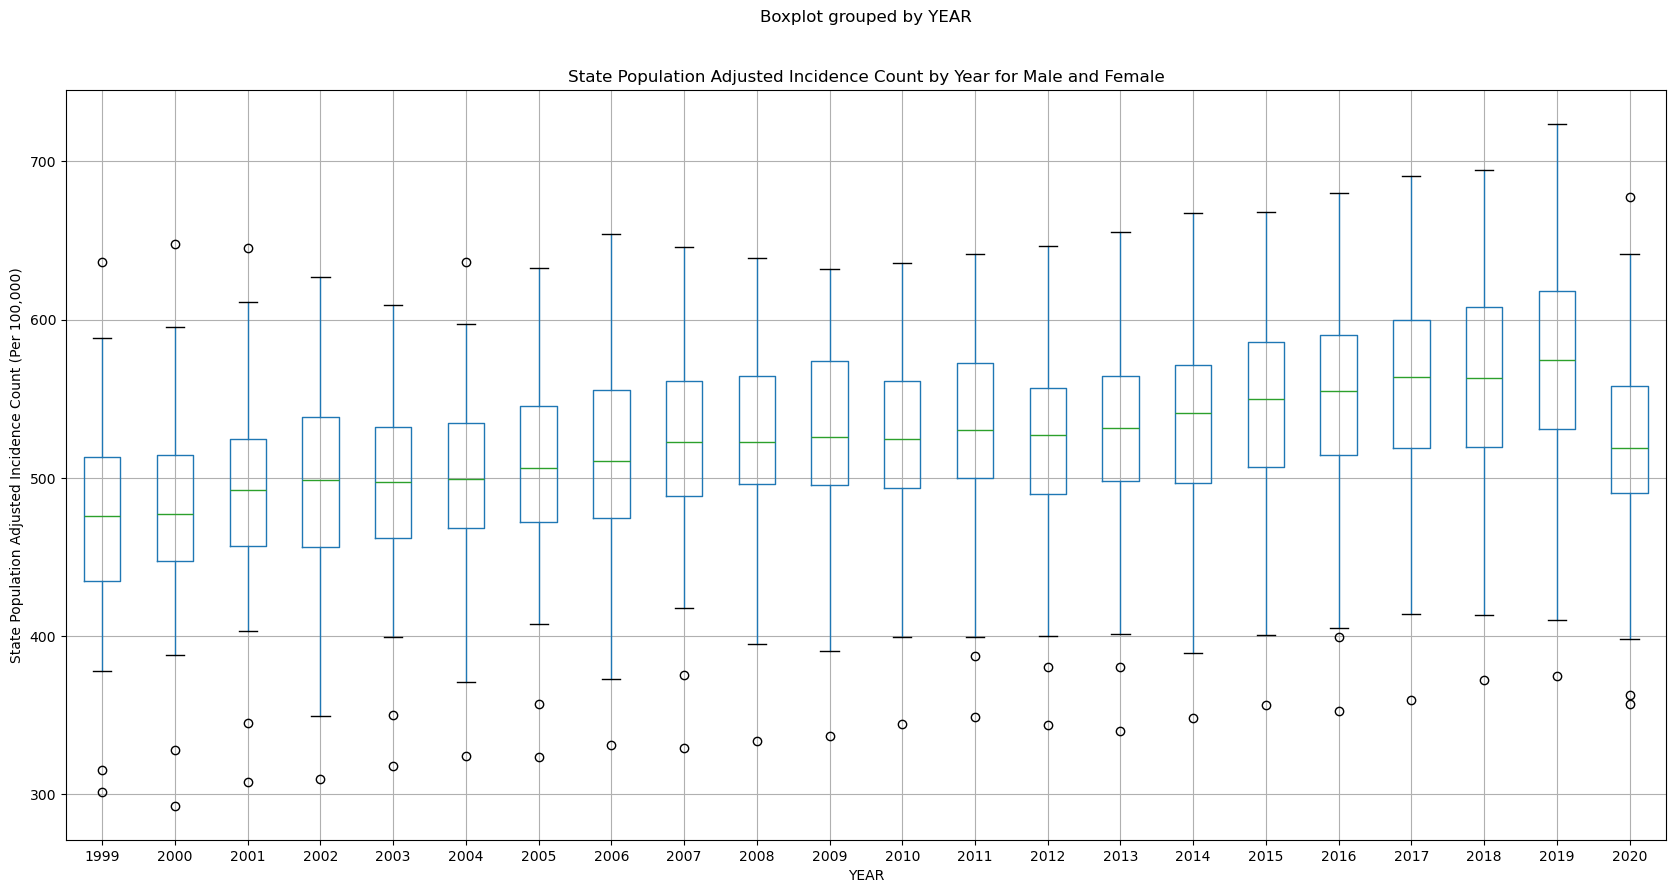

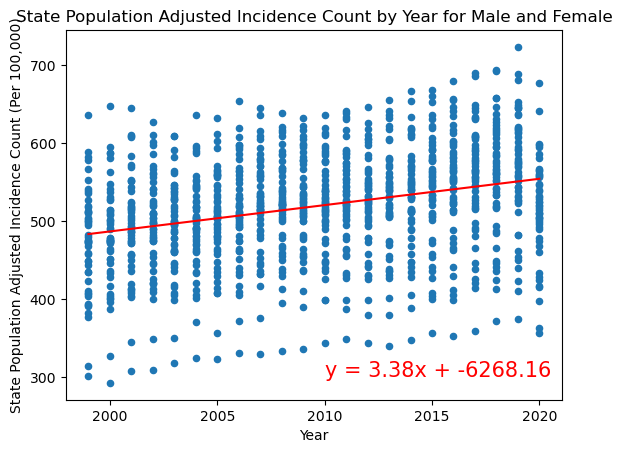

           AREA AGE_ADJUSTED_CI_LOWER AGE_ADJUSTED_CI_UPPER AGE_ADJUSTED_RATE  \
2094    Alabama                 206.5                 215.1             210.8   
2096    Alabama                 210.4                 219.0             214.7   
2098    Alabama                 208.6                 217.0             212.8   
2100    Alabama                 204.3                 212.6             208.4   
2102    Alabama                 204.1                 212.4             208.3   
...         ...                   ...                   ...               ...   
984802  Wyoming                 131.4                 149.9             140.4   
984806  Wyoming                 126.9                 144.9             135.7   
984808  Wyoming                 131.2                 149.2             140.0   
984810  Wyoming                 129.2                 146.8             137.8   
984812  Wyoming                 127.9                 145.1             136.3   

        COUNT EVENT_TYPE  P

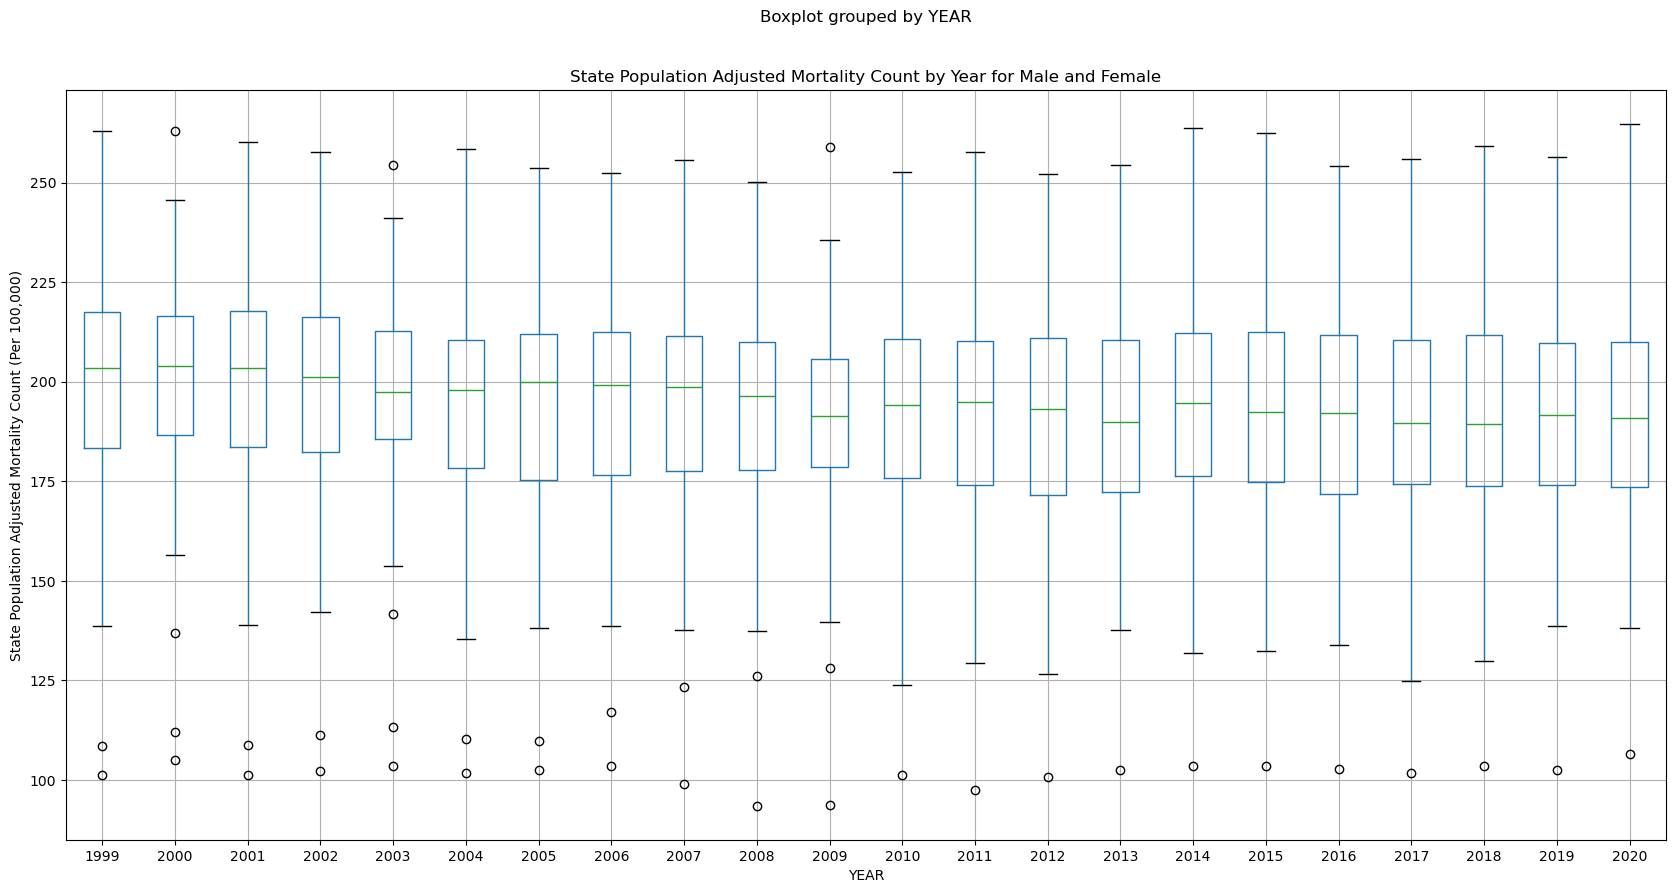

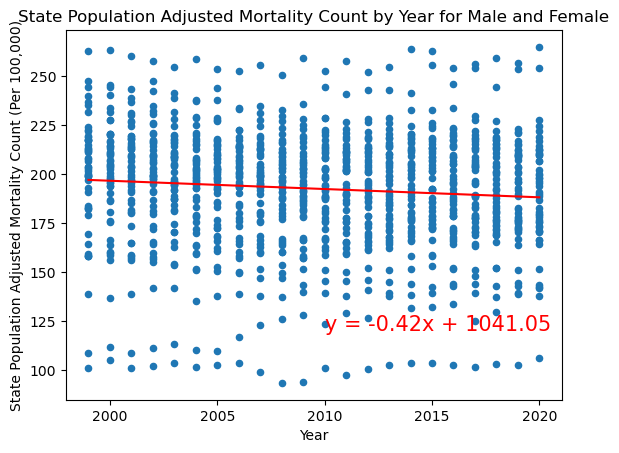

           AREA AGE_ADJUSTED_CI_LOWER AGE_ADJUSTED_CI_UPPER AGE_ADJUSTED_RATE  \
0       Alabama                 359.6                 374.7             367.1   
2       Alabama                 362.0                 377.0             369.4   
4       Alabama                 377.7                 392.9             385.2   
6       Alabama                 382.3                 397.6             389.9   
8       Alabama                 357.5                 372.3             364.8   
...         ...                   ...                   ...               ...   
982708  Wyoming                 363.7                 407.3             385.0   
982712  Wyoming                 358.6                 402.0             379.8   
982714  Wyoming                 363.5                 406.7             384.6   
982716  Wyoming                 373.8                 417.5             395.2   
982718  Wyoming                 357.3                 400.2             378.3   

        COUNT EVENT_TYPE  P

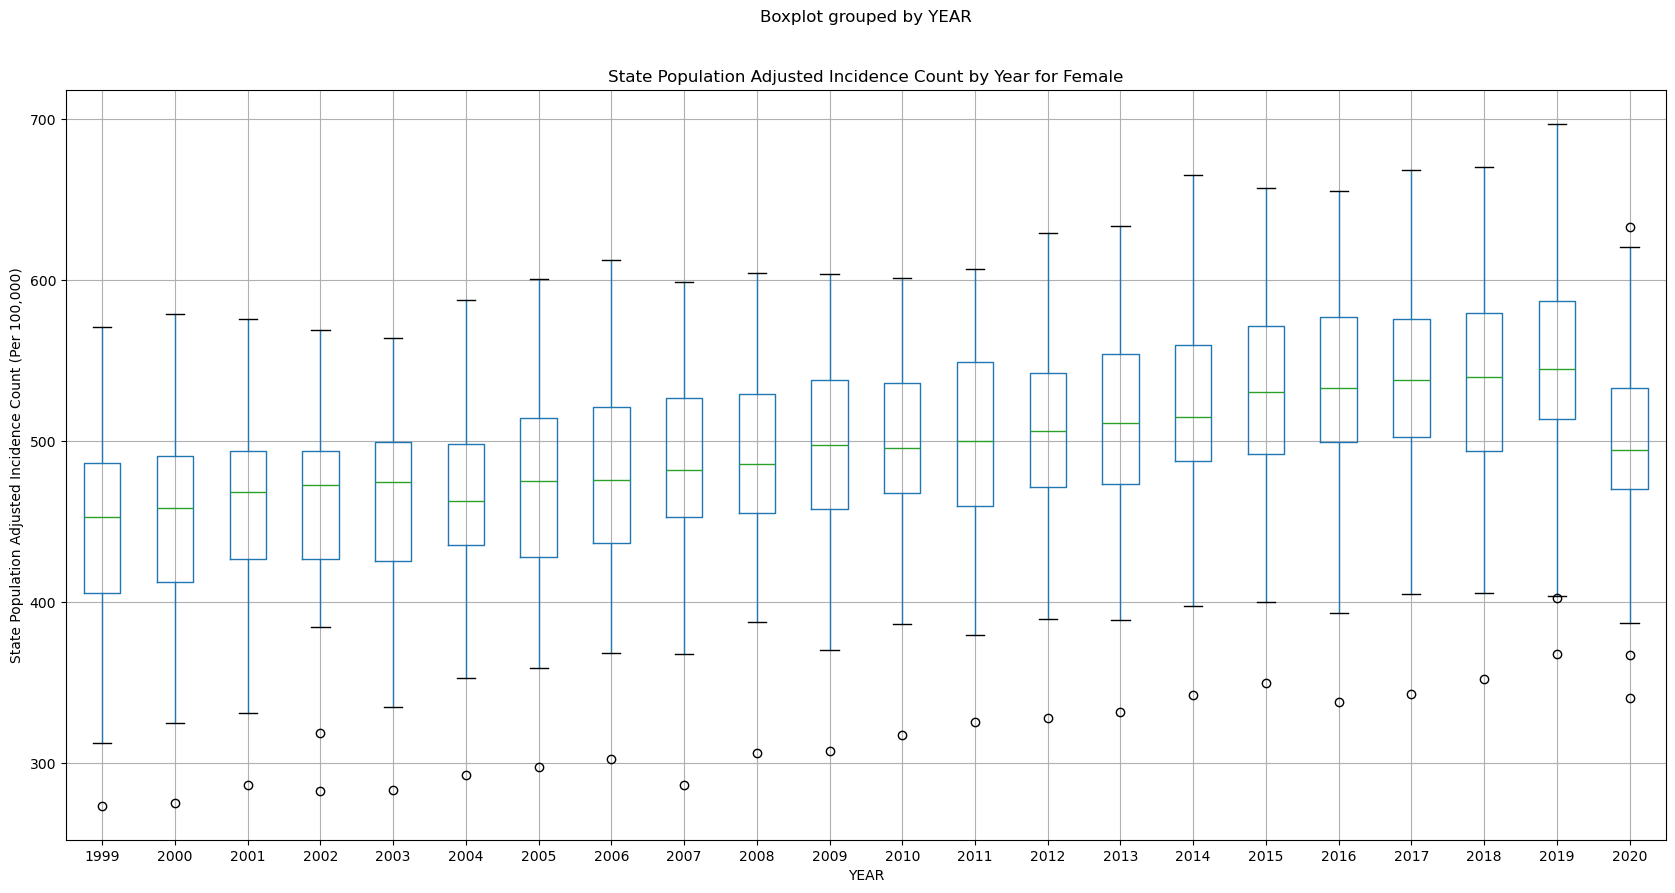

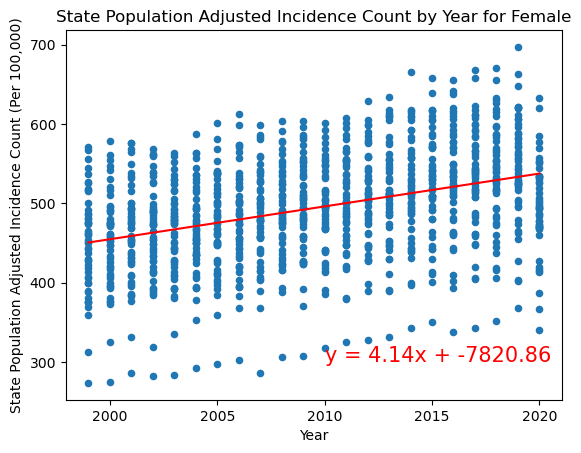

           AREA AGE_ADJUSTED_CI_LOWER AGE_ADJUSTED_CI_UPPER AGE_ADJUSTED_RATE  \
1       Alabama                 160.6                 170.5             165.5   
3       Alabama                 160.8                 170.6             165.7   
5       Alabama                 164.7                 174.7             169.7   
7       Alabama                 158.3                 168.0             163.1   
9       Alabama                 158.9                 168.6             163.7   
...         ...                   ...                   ...               ...   
982709  Wyoming                 110.2                 134.3             121.8   
982713  Wyoming                 105.1                 128.1             116.1   
982715  Wyoming                 113.7                 137.6             125.2   
982717  Wyoming                 108.6                 131.6             119.7   
982719  Wyoming                 108.8                 131.5             119.7   

        COUNT EVENT_TYPE  P

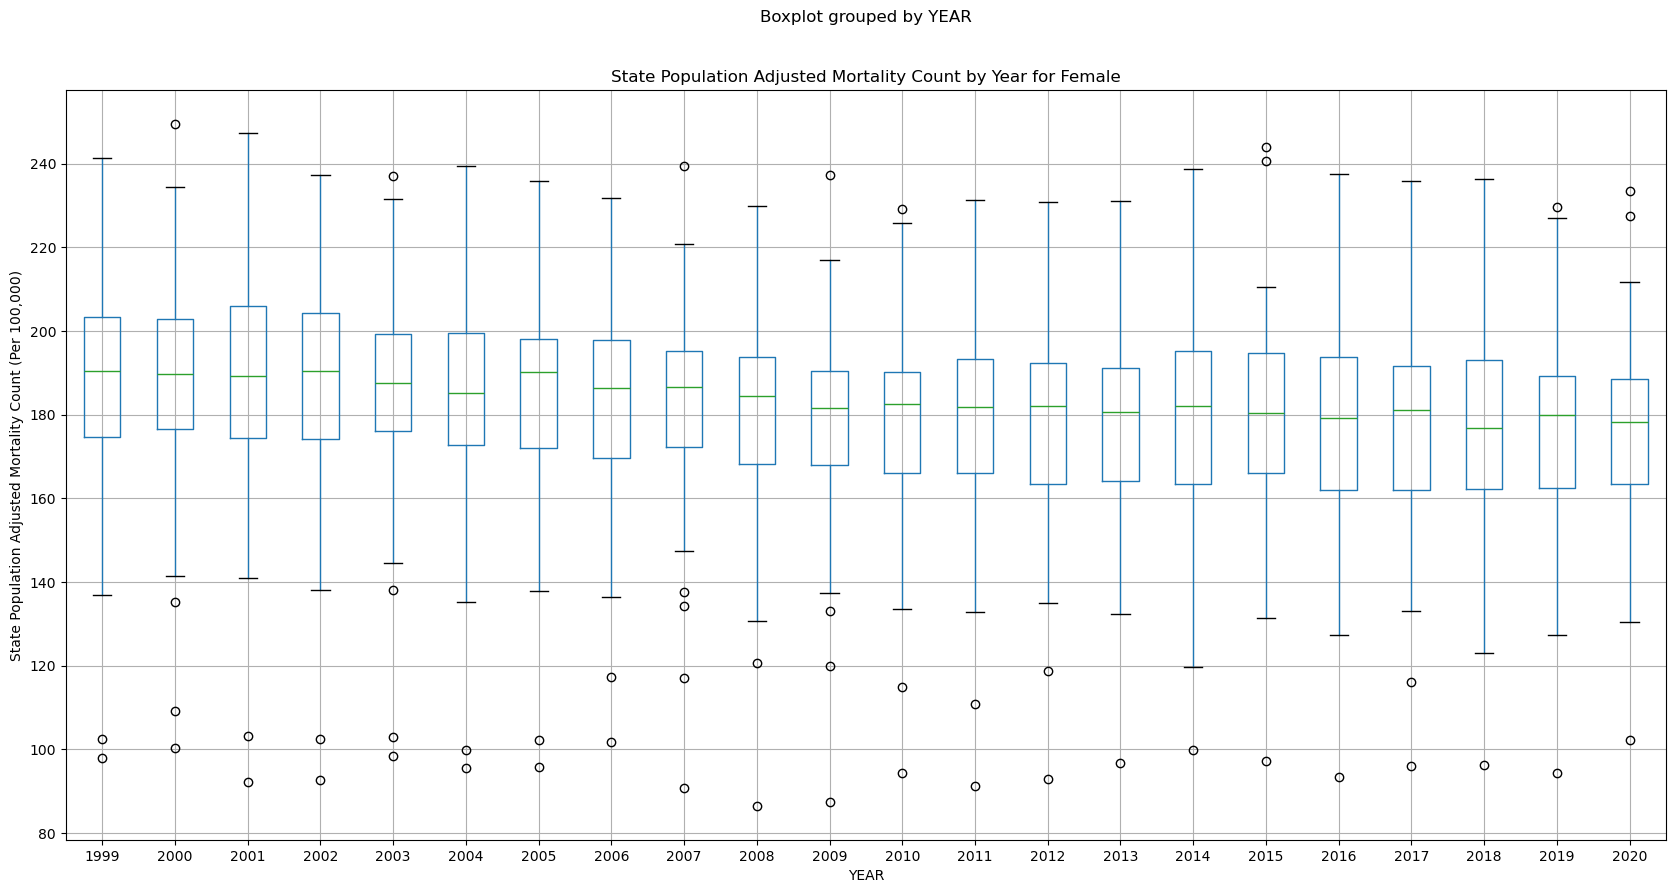

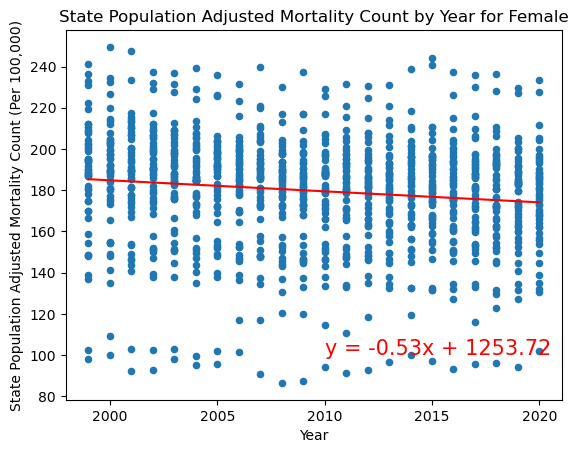

           AREA AGE_ADJUSTED_CI_LOWER AGE_ADJUSTED_CI_UPPER AGE_ADJUSTED_RATE  \
1104    Alabama                 504.6                 525.2             514.8   
1106    Alabama                 522.0                 542.9             532.3   
1108    Alabama                 549.4                 570.8             560.0   
1110    Alabama                 545.9                 567.0             556.4   
1112    Alabama                 537.4                 558.2             547.7   
...         ...                   ...                   ...               ...   
983812  Wyoming                 410.4                 456.8             433.1   
983816  Wyoming                 429.8                 476.5             452.6   
983818  Wyoming                 399.7                 444.3             421.5   
983820  Wyoming                 425.4                 470.9             447.7   
983822  Wyoming                 378.1                 420.2             398.7   

        COUNT EVENT_TYPE  P

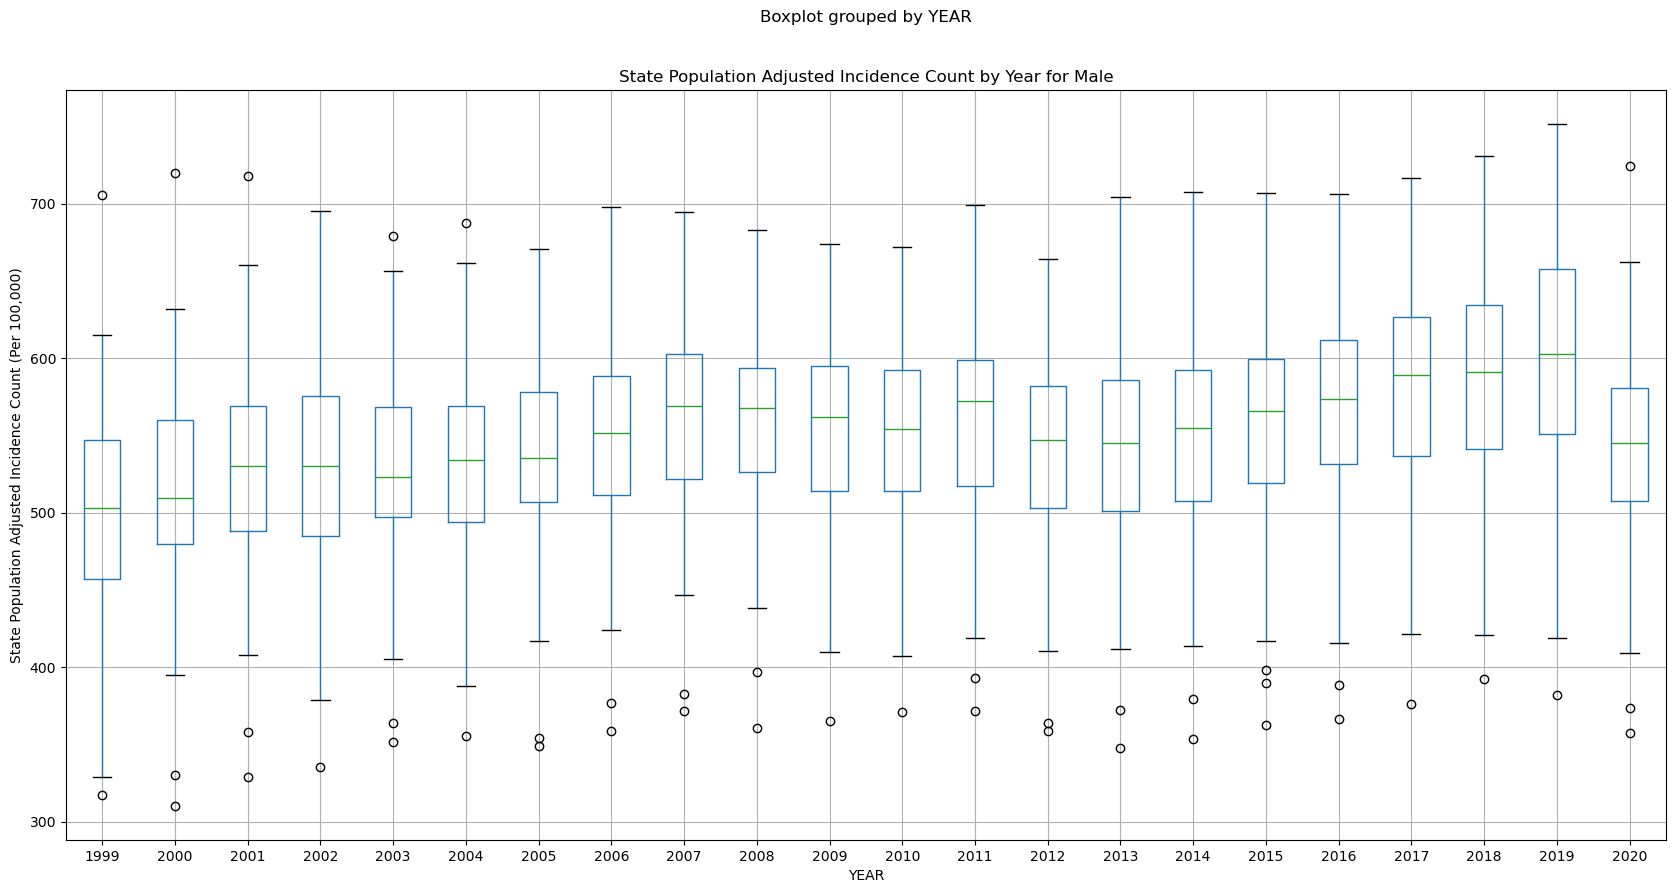

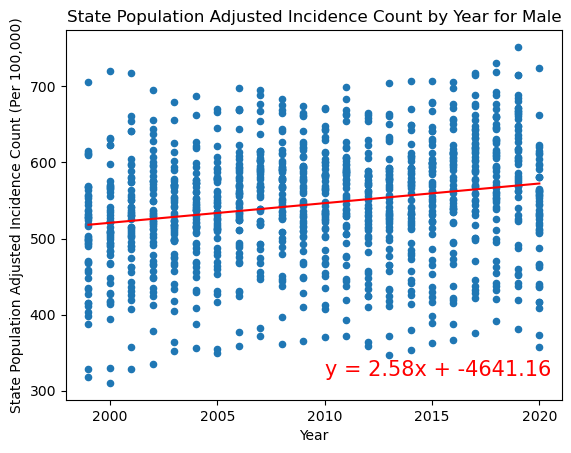

           AREA AGE_ADJUSTED_CI_LOWER AGE_ADJUSTED_CI_UPPER AGE_ADJUSTED_RATE  \
1105    Alabama                 275.0                 290.9             282.9   
1107    Alabama                 283.9                 300.0             291.8   
1109    Alabama                 275.0                 290.8             282.8   
1111    Alabama                 272.6                 288.2             280.3   
1113    Alabama                 268.9                 284.2             276.5   
...         ...                   ...                   ...               ...   
983813  Wyoming                 150.6                 180.2             164.9   
983817  Wyoming                 143.8                 172.1             157.4   
983819  Wyoming                 145.0                 173.2             158.6   
983821  Wyoming                 147.6                 175.5             161.1   
983823  Wyoming                 143.7                 170.9             156.9   

        COUNT EVENT_TYPE  P

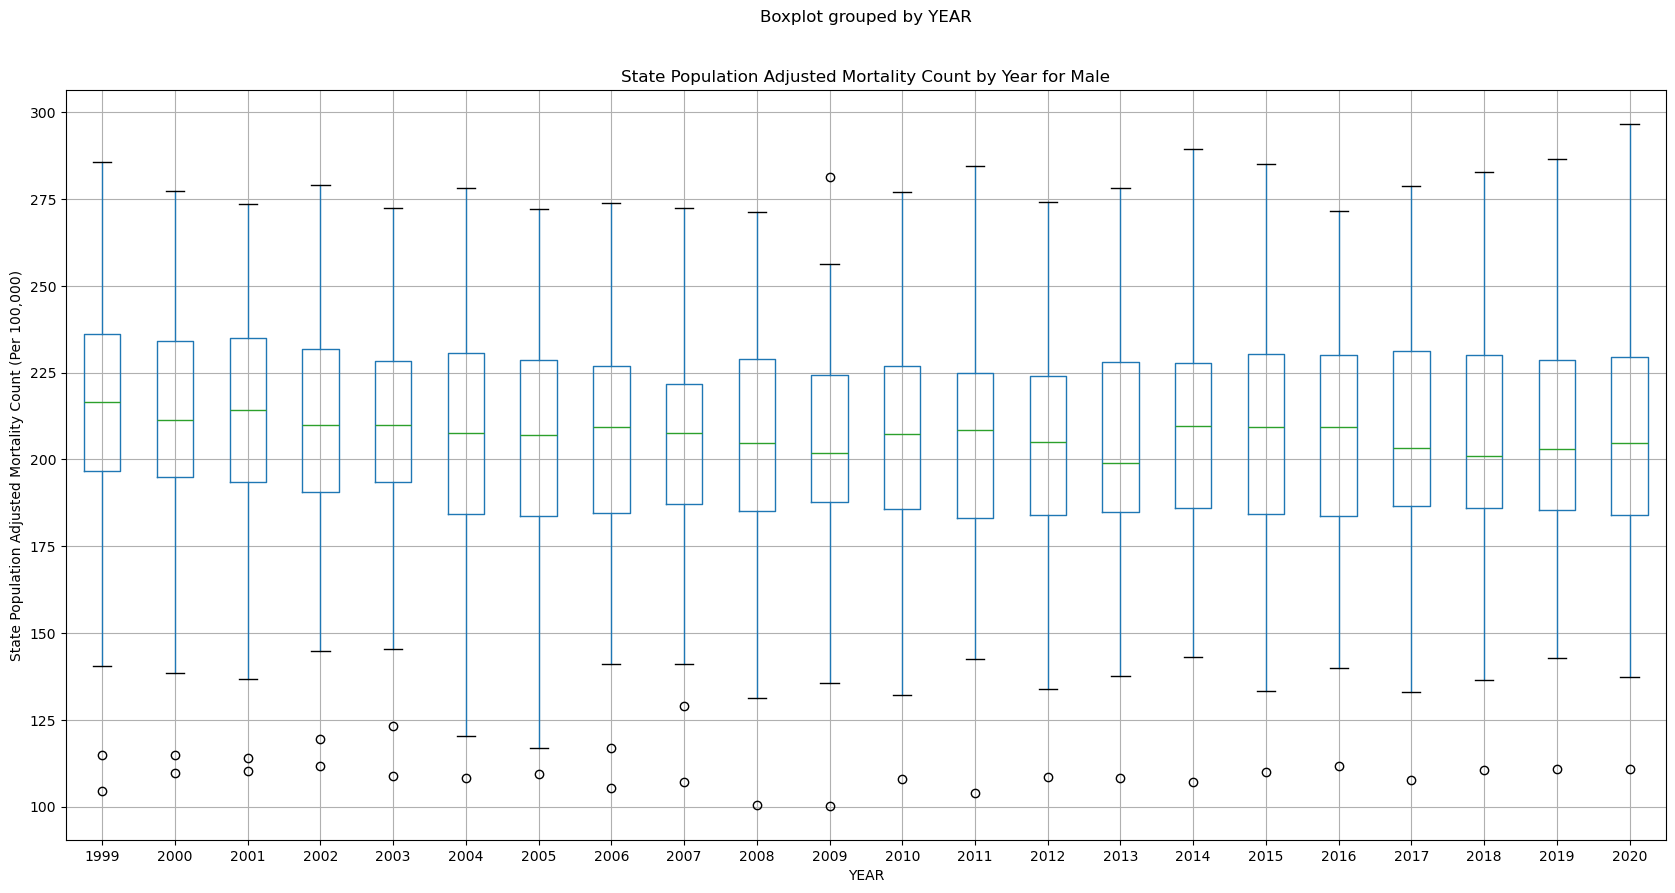

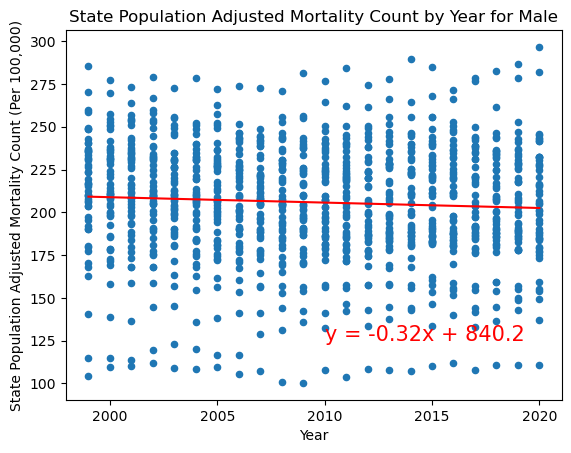

In [150]:
def all_cancer_gender(event_type, sex, location):
    
    all_cancer_df = state_df.loc[(state_df["SITE"]=="All Cancer Sites Combined") & (state_df["SEX"] == sex) \
    & (state_df["RACE"] == "All Races") & (state_df["EVENT_TYPE"]==event_type)]
    drop_indices = all_cancer_df[all_cancer_df["YEAR"] == "2016-2020"].index
    all_cancer_df = all_cancer_df.drop(index = drop_indices)
    all_cancer_df = all_cancer_df.astype({"COUNT": int, "POPULATION": int, "YEAR": int})
    all_cancer_df["Population Adjusted"] = (all_cancer_df["COUNT"]/all_cancer_df["POPULATION"]) * 100000
    print(all_cancer_df)
    
    all_cancer_df.boxplot("Population Adjusted", by="YEAR", figsize=(20, 10))
    plt.title(f"State Population Adjusted {event_type} Count by Year for {sex}")
    plt.ylabel(f"State Population Adjusted {event_type} Count (Per 100,000)")
    plt.show()

    all_cancer_df.plot.scatter("YEAR", "Population Adjusted")
    x_values = all_cancer_df['YEAR']
    y_values = all_cancer_df['Population Adjusted']

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(2010,location),fontsize=15,color="red")
    plt.xlabel("Year")
    plt.ylabel(f"State Population Adjusted {event_type} Count (Per 100,000)")
    plt.title(f"State Population Adjusted {event_type} Count by Year for {sex}")
    plt.show()
    

all_cancer_gender("Incidence", "Male and Female", 300)
all_cancer_gender("Mortality", "Male and Female", 120)
all_cancer_gender("Incidence", "Female", 300)
all_cancer_gender("Mortality", "Female", 100)
all_cancer_gender("Incidence", "Male", 320)
all_cancer_gender("Mortality", "Male", 125)